# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


[304.18307453]
R2 0.03530218264671636


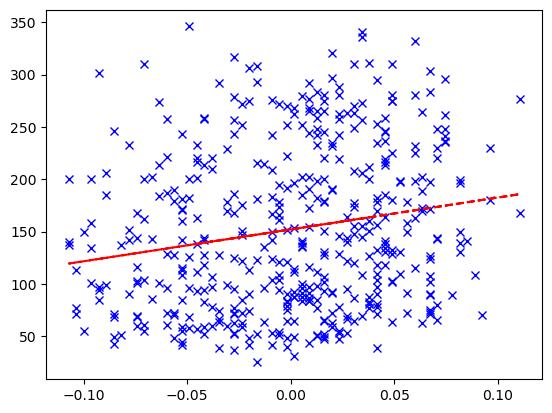

In [32]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat - y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red');

In [11]:
def quality_of_fit(y, y_hat):
  # Residuals
  resid = y_hat - y

  # RSS
  RSS = np.sum(resid ** 2)

  # RSE
  RSE = sqrt(RSS / (len(y) - 2))
  
  # MSE
  MSE = RSS / len(y)

  return (RSS, RSE, MSE)

age: R2 = 0.035, RSE = 75.806, MSE = 5720.547, RSS = 2528481.782, t-statistic = 4.013
sex: R2 = 0.002, RSE = 77.109, MSE = 5918.889, RSS = 2616148.894, t-statistic = 0.904
bmi: R2 = 0.344, RSE = 62.515, MSE = 3890.457, RSS = 1719581.811, t-statistic = 15.187
bp: R2 = 0.195, RSE = 69.252, MSE = 4774.114, RSS = 2110158.345, t-statistic = 10.321
s1: R2 = 0.045, RSE = 75.426, MSE = 5663.316, RSS = 2503185.506, t-statistic = 4.551
s2: R2 = 0.030, RSE = 76.002, MSE = 5750.241, RSS = 2541606.567, t-statistic = 3.708
s3: R2 = 0.156, RSE = 70.911, MSE = 5005.662, RSS = 2212502.436, t-statistic = -9.013
s4: R2 = 0.185, RSE = 69.664, MSE = 4831.138, RSS = 2135363.167, t-statistic = 10.003
s5: R2 = 0.320, RSE = 63.634, MSE = 4030.999, RSS = 1781701.435, t-statistic = 14.397
s6: R2 = 0.146, RSE = 71.312, MSE = 5062.381, RSS = 2237572.223, t-statistic = 8.683
If we measure quality of fit as highest R2, the best fit was bmi with a R^2 of 0.3439237602253802


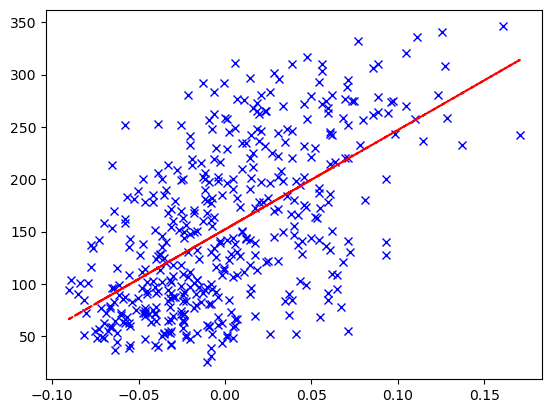

In [35]:
# Step 2

best_fit = None
best_fit_R2 = 0
y_hats = {}

for name in var_names:
    # Get data
    x = X[name]
    x_data = np.array([x.to_numpy()]).T

    # Get estimate and store it
    _ = model.fit(x_data, y.to_numpy())
    y_hat = model.predict(x_data)
    y_hats[name] = y_hat
    
    # Residuals
    residuals = y_hat - y

    # Get quality of fit (except of R2)
    RSS, RSE, MSE = quality_of_fit(y, y_hat)

    # t-statistic
    t_stat = model.coef_[0] / sqrt((RSS / (len(y) - 2)) / np.sum((x_data - np.mean(x_data)) ** 2))

    # R2
    R2 = model.score(x_data, y)

    # Display statistics
    print(f"{name}: R2 = {R2:.3f}, RSE = {RSE:.3f}, MSE = {MSE:.3f}, RSS = {RSS:.3f}, t-statistic = {t_stat:.3f}")

    if R2 > best_fit_R2:
        best_fit = name
        best_fit_R2 = R2

print(f"If we measure quality of fit as highest R2, the best fit was {best_fit} with a R^2 of {best_fit_R2}")

# make a plot
plt.subplot(111)

# plot data
plt.plot(X[best_fit], y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(X[best_fit], y_hats[best_fit], ls='--', color='red');

In [37]:
# Step 3

# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# Get data
x_data = X.to_numpy()

# fit model
_ = model.fit(x_data, y.to_numpy())

# get model predictions for each x value
y_hat = model.predict(x_data)

# Quality of fit
RSS, RSE, MSE = quality_of_fit(y, y_hat)

# Get f-statistic?
TSS = np.sum((y - np.mean(y)) ** 2)
f_stat = ((TSS - RSS) / (len(var_names)) / (RSS / (len(y) - len(var_names) - 1)))

# get R2 value
R2 = model.score(x_data, y)

# Display info
print(f"R2 = {R2:.3f}, RSE = {RSE:.3f}, MSE = {MSE:.3f}, RSS = {RSS:.3f}, f-statistic = {f_stat:.3f}")

R2 = 0.518, RSE = 53.598, MSE = 2859.696, RSS = 1263985.786, f-statistic = 46.272


In [60]:
# Step 5 - Step 2 Replicated

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_fit = None
best_fit_R2 = 0
y_hats = {}

for name in var_names:
  ### Train Estimates ###
  # Get data
  x = X_train[name]
  x_data = np.array([x.to_numpy()]).T

  # Get estimate and store it
  _ = model.fit(x_data, y_train.to_numpy())
  y_hat = model.predict(x_data)
  y_hats[name] = y_hat

  # Residuals
  residuals = y_hat - y_train

  # Get quality of fit (except of R2)
  RSS, RSE, MSE = quality_of_fit(y_train, y_hat)

  # R2
  R2 = model.score(x_data, y_train)

  ### Test Estimates ###
  # Get data
  x = X_test[name]
  x_data = np.array([x.to_numpy()]).T

  # Get estimate and store it
  _ = model.fit(x_data, y_test.to_numpy())
  y_hat = model.predict(x_data)
  y_hats[name] = y_hat

  # Get quality of fit (except of R2)
  RSS_test, RSE_test, MSE_test = quality_of_fit(y_test, y_hat)

  # R2
  R2_test = model.score(x_data, y_test)

  print(f"{name}:")
  print(f"\tTrain\t R2 = {R2:.3f},\tRSE = {RSE:.3f},\tMSE = {MSE:.3f},\tRSS = {RSS:.3f}")
  print(f"\tTest\t R2 = {R2_test:.3f},\tRSE = {RSE_test:.3f},\tMSE = {MSE_test:.3f},\tRSS = {RSS_test:.3f}")
  print(f"\tTrain R2 - Test R2 = {R2 - R2_test:.3f} (expected to be > 0 if model is overfit)")
  print(f"\tTest RSE - Train RSE = {RSE_test - RSE:.3f} (expected to be > 0 if model is overfit)")

age:
	Train	 R2 = 0.039,	RSE = 76.649,	MSE = 5841.751,	RSS = 2062138.279
	Test	 R2 = 0.022,	RSE = 72.807,	MSE = 5181.699,	RSS = 461171.203
	Train R2 - Test R2 = 0.017 (expected to be > 0 if model is overfit)
	Test RSE - Train RSE = -3.842 (expected to be > 0 if model is overfit)
sex:
	Train	 R2 = 0.000,	RSE = 78.171,	MSE = 6076.090,	RSS = 2144859.878
	Test	 R2 = 0.038,	RSE = 72.214,	MSE = 5097.617,	RSS = 453687.922
	Train R2 - Test R2 = -0.038 (expected to be > 0 if model is overfit)
	Test RSE - Train RSE = -5.957 (expected to be > 0 if model is overfit)
bmi:
	Train	 R2 = 0.366,	RSE = 62.258,	MSE = 3854.113,	RSS = 1360501.766
	Test	 R2 = 0.258,	RSE = 63.431,	MSE = 3933.057,	RSS = 350042.074
	Train R2 - Test R2 = 0.108 (expected to be > 0 if model is overfit)
	Test RSE - Train RSE = 1.173 (expected to be > 0 if model is overfit)
bp:
	Train	 R2 = 0.198,	RSE = 70.015,	MSE = 4874.361,	RSS = 1720649.324
	Test	 R2 = 0.176,	RSE = 66.820,	MSE = 4364.552,	RSS = 388445.162
	Train R2 - Test R2 = 

### Results of replicating Step 2
We conclude that the model is not overfit since there was not a significant decrease between the training R2 and the test R2 nor an increase between the training RSE and the test RSE.

In [64]:
# Step 5 - Step 3 Replicated

# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

### Train Estimates ###
# Get data
x_train = X_train.to_numpy()

# fit model
_ = model.fit(x_train, y_train.to_numpy())

# get model predictions for each x value
y_train_hat = model.predict(x_train)

# Quality of fit
RSS_train, RSE_train, MSE_train = quality_of_fit(y_train, y_train_hat)

# get R2 value
R2_train = model.score(x_train, y_train)

### Test Estimates ###
# Get data
x_test = X_test.to_numpy()

# fit model
_ = model.fit(x_test, y_test.to_numpy())

# get model predictions for each x value
y_test_hat = model.predict(x_test)

# Quality of fit
RSS_test, RSE_test, MSE_test = quality_of_fit(y_test, y_test_hat)

# get R2 value
R2_test = model.score(x_test, y_test)

print(f"Train\tR2 = {R2_train:.3f},\tRSE = {RSE_train:.3f},\tMSE = {MSE_train:.3f},\tRSS = {RSS_train:.3f}")
print(f"Test\tR2 = {R2_test:.3f},\tRSE = {RSE_test:.3f},\tMSE = {MSE_test:.3f},\tRSS = {RSS_test:.3f}")
print(f"Train\tR2 - Test R2 = {R2_train - R2_test:.3f} (expected to be > 0 if model is overfit)")
print(f"Test\tRSE - Train RSE = {RSE_test - RSE_train:.3f} (expected to be > 0 if model is overfit)")

Train	R2 = 0.528,	RSE = 53.711,	MSE = 2868.550,	RSS = 1012598.045
Test	R2 = 0.516,	RSE = 51.237,	MSE = 2566.213,	RSS = 228392.930
Train	R2 - Test R2 = 0.012 (expected to be > 0 if model is overfit)
Test	RSE - Train RSE = -2.474 (expected to be > 0 if model is overfit)


### Results of replicating Step 3
Once again, we conclude that our model is not overfit, and that it generalizes nicely.